## Final Project ##

# **Set Up** #

In [253]:

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely import wkt
from shapely.errors import WKTReadingError
import os
from numpy.random import seed
from pysal.lib import weights
from pysal.explore import esda
from fuzzywuzzy import process

new_working_directory = 'C:/Users/steph/Documents/School/Quarter 5/Geo/Final'
os.chdir(new_working_directory)




C:\Users\steph\AppData\Local\Temp\ipykernel_12880\595033769.py:6: DeprecationWarning: WKTReadingError is deprecated and will be removed in a future version. Use ShapelyError instead (functions previously raising {name} will now raise a ShapelyError instead).
  from shapely.errors import WKTReadingError


**Maps of Honduras**


In [254]:

honduras_0 = gpd.read_file('hnd_admbnda_adm0_sinit_20161005.shp') #General Shape
honduras_1 = gpd.read_file('hnd_admbnda_adm1_sinit_20161005.shp')#Department Shape
honduras_2 = gpd.read_file('hnd_admbnda_adm2_sinit_20161005.shp')#Municipalities
honduras_3 = gpd.read_file('hnd_admbnda_adm3_sinit_20161005.shp')#Community


**4 Shapes of boundaries**

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\422737432.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


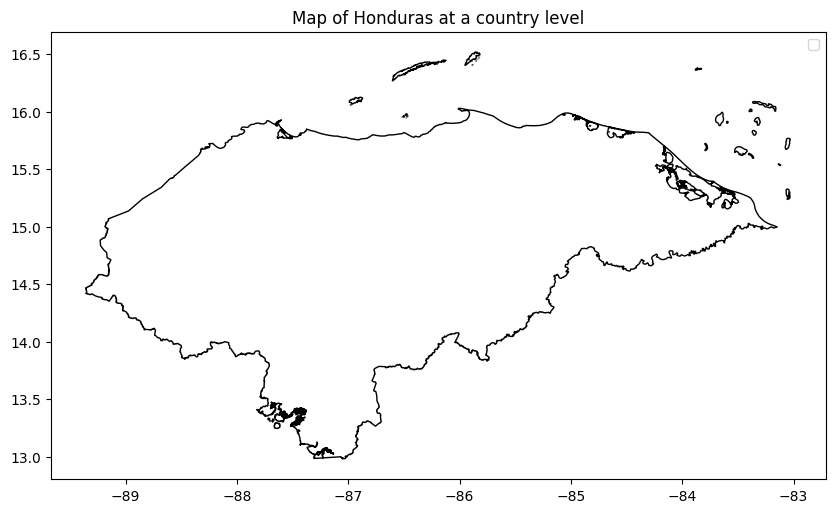

In [255]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels
honduras_0.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Honduras at a country level')

# Show the plot
plt.show()


C:\Users\steph\AppData\Local\Temp\ipykernel_12880\3375088200.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


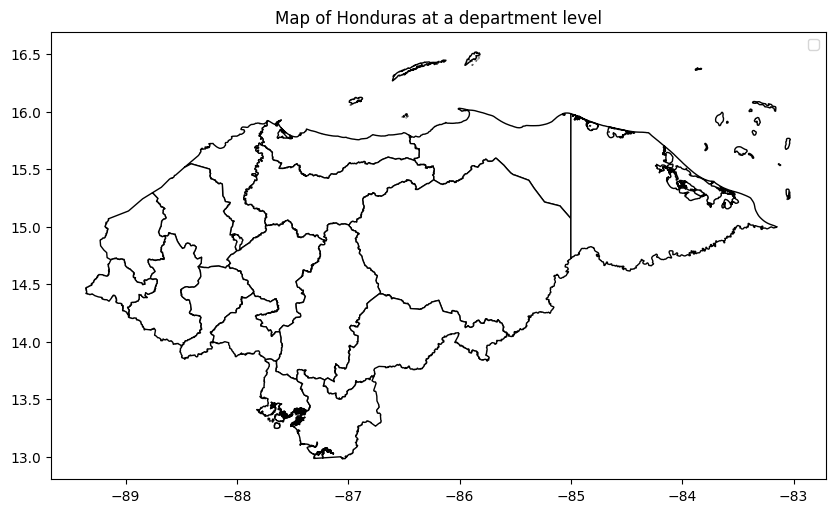

In [256]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels
honduras_1.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Honduras at a department level')

# Show the plot
plt.show()


C:\Users\steph\AppData\Local\Temp\ipykernel_12880\3132457312.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


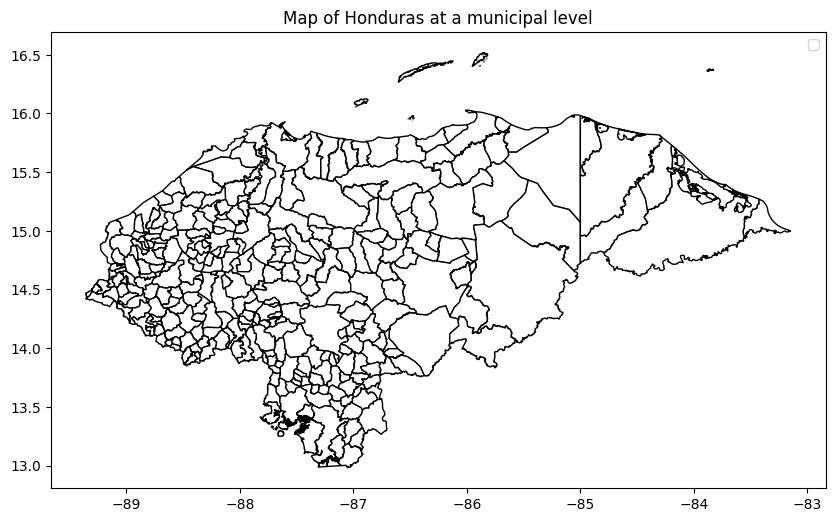

In [257]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels
honduras_2.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Honduras at a municipal level')

# Show the plot
plt.show()

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\449210516.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


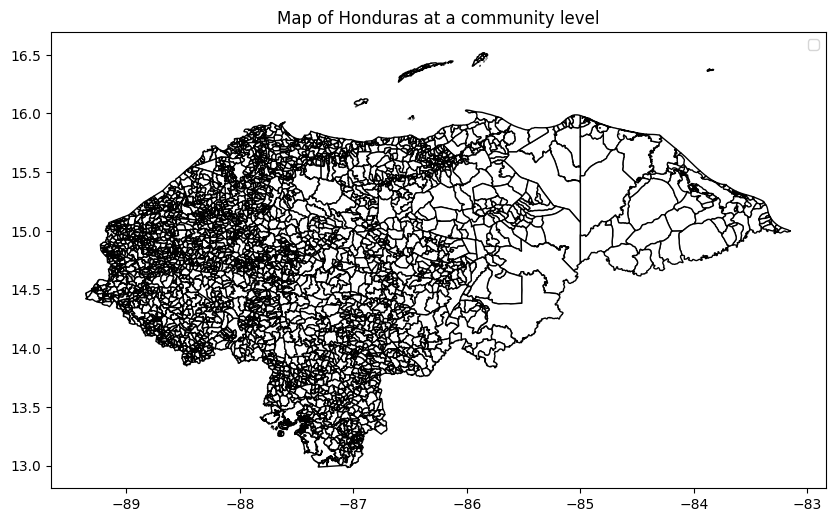

In [250]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels
honduras_3.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Honduras at a community level')

# Show the plot
plt.show()

**Filter out for Distrito Central**

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\2118103118.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


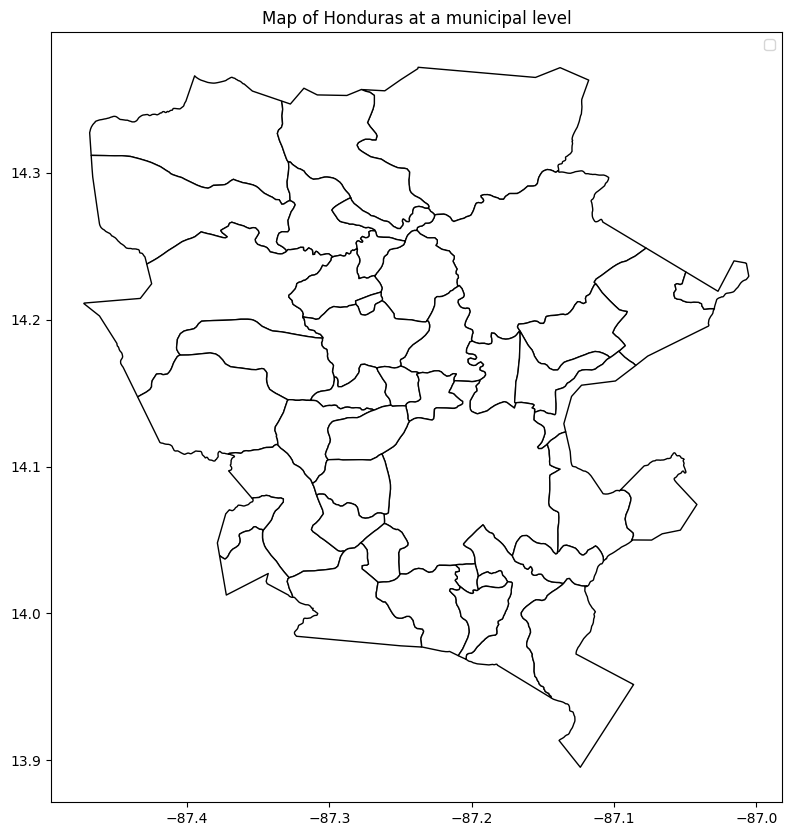

In [258]:
Distrito_Central_2 = honduras_3[honduras_3['admin2Name']== 'Distrito Central' ]

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels
Distrito_Central_2.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Honduras at a municipal level')

# Show the plot
plt.show()





C:\Users\steph\AppData\Local\Temp\ipykernel_12880\2822226336.py:15: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


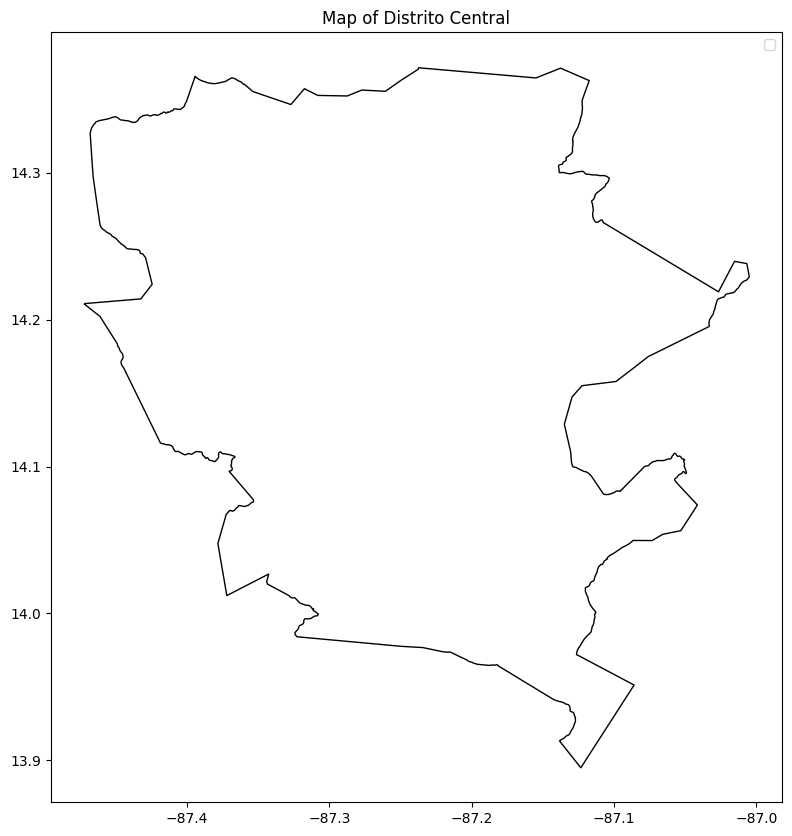

In [259]:

Distrito_Central = honduras_2[honduras_2['ADM2_REF']== 'Distrito Central' ]



# Plotting
fig, ax = plt.subplots(figsize=(10, 10))



# Plot each GeoDataFrame with different colors and labels

Distrito_Central.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Distrito Central')

# Show the plot
plt.show()

# **Mapping Urban areas in Tegucigalpa and Inequality** #

In [260]:
#Run First
dc_catastro = gpd.read_file('COLONIAS_AREA_URBANA_DC.csv')

dc_catastro['geometry'] = dc_catastro['the_geom']

dc_catastro = dc_catastro.drop(columns=['the_geom'])




C:\Users\steph\AppData\Local\Temp\ipykernel_12880\3387667303.py:4: UserWarning: Geometry column does not contain geometry.
  dc_catastro['geometry'] = dc_catastro['the_geom']


In [261]:
# Run second it checks for any null or empty strings in the 'geometry' column
invalid_geom_rows = dc_catastro[dc_catastro['geometry'].isnull() | (dc_catastro['geometry'] == '')]
print(f"Rows with invalid geometries: {len(invalid_geom_rows)}")


Rows with invalid geometries: 1


In [262]:

##Run third: this code was used to fix my geometry column
def safe_loads(wkt_string):
    try:
        return wkt.loads(wkt_string)
    except WKTReadingError as e:
        print(f"Error loading WKT: {e}")
        # Return None or some sentinel value for invalid geometries
        return None

# Apply 'safe_loads' to the 'geometry' column
dc_catastro['geometry'] = dc_catastro['geometry'].apply(safe_loads)

# Filter out rows where geometry conversion failed (if any)
dc_catastro = dc_catastro[dc_catastro['geometry'].notnull()]

Error loading WKT: ParseException: Expected number but encountered end of stream
Error loading WKT: ParseException: Expected number but encountered end of stream
Error loading WKT: ParseException: Expected number but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream
Error loading WKT: ParseException: Expected number but encountered end of stream
Error loading WKT: ParseException: Expected word but encountered end of stream


In [263]:
# Run last Convert the DataFrame to a GeoDataFrame, setting the 'geometry' column as the geometric data and check that it happen
dc_catastro = gpd.GeoDataFrame(dc_catastro, geometry='geometry')
dc_catastro

,FID,fid,OBJECTID,SECTOR,NOM_COL,COD_COL_1,COD_COL_2,TIPO,COD_COL_3,OBSERVACIO,Shape_Leng,Shape_Area,geometry
0,COLONIAS_AREA_URBANA_DC.1,1,1,SECTOR 02,COLONIA MIRAMESI,205,,BARRIO O COLONIA,,,2298.027031,135455.4537,"MULTIPOLYGON (((477950.892 1561029.637, 477951..."
1,COLONIAS_AREA_URBANA_DC.2,2,2,SECTOR 02,BARRIO PUNTA CALIENTE,206,,BARRIO O COLONIA,,,375.4302849,6781.407347,"MULTIPOLYGON (((477845.509 1560738.408, 477846..."
2,COLONIAS_AREA_URBANA_DC.3,3,3,SECTOR 02,COLONIA LAS CANTERAS,207,,BARRIO O COLONIA,,,1395.849089,56387.38698,"MULTIPOLYGON (((478285.369 1560857.546, 478285..."
3,COLONIAS_AREA_URBANA_DC.4,4,4,SECTOR 02,BARRIO EL BOSQUE,202,805,BARRIO O COLONIA,,,2395.079472,189043.9374,"MULTIPOLYGON (((478367.490 1560790.898, 478381..."
4,COLONIAS_AREA_URBANA_DC.13,13,13,SECTOR 01,BARRIO ABAJO,101,,BARRIO O COLONIA,,,1895.652517,141541.1671,"MULTIPOLYGON (((477567.136 1559981.978, 477554..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,COLONIAS_AREA_URBANA_DC.979,979,0,SECTOR 29,COLONIA BRISAS DE SUYAPA,2904,,BARRIO O COLONIA,,,0,0,"MULTIPOLYGON (((484026.710 1555867.373, 484037..."
979,COLONIAS_AREA_URBANA_DC.980,980,0,SECTOR 29,,,,,,,0,0,"MULTIPOLYGON (((485919.535 1556307.959, 485912..."
980,COLONIAS_AREA_URBANA_DC.982,982,0,SECTOR 29,COLONIA LA TRAVESIA,2913,1617,BARRIO O COLONIA,,,0,0,"MULTIPOLYGON (((483163.439 1558693.197, 483159..."
981,COLONIAS_AREA_URBANA_DC.983,983,0,SECTOR 29,COLONIA LA TRAVESIA,2913,1617,BARRIO O COLONIA,,,0,0,"MULTIPOLYGON (((483112.836 1558728.416, 483111..."


In [264]:
# Group by the 'sector' column this creates the CATASTRO
grouped = dc_catastro.groupby('SECTOR')

# Create a convex hull or some other aggregation of the geometries
aggregated = grouped['geometry'].agg(lambda x: x.unary_union.convex_hull)
sectors_gdf = gpd.GeoDataFrame(aggregated, columns=['geometry'])

# Now 'sectors_gdf' has the aggregated geometries

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\1743331335.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


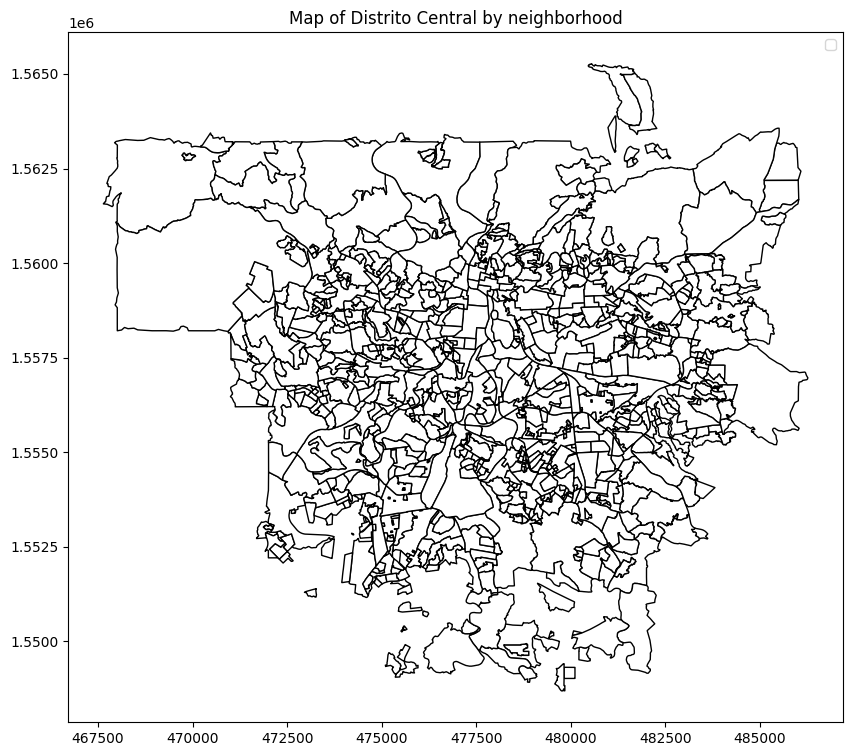

In [266]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels

dc_catastro.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Distrito Central by neighborhood')

# Show the plot
plt.show()

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\192089412.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


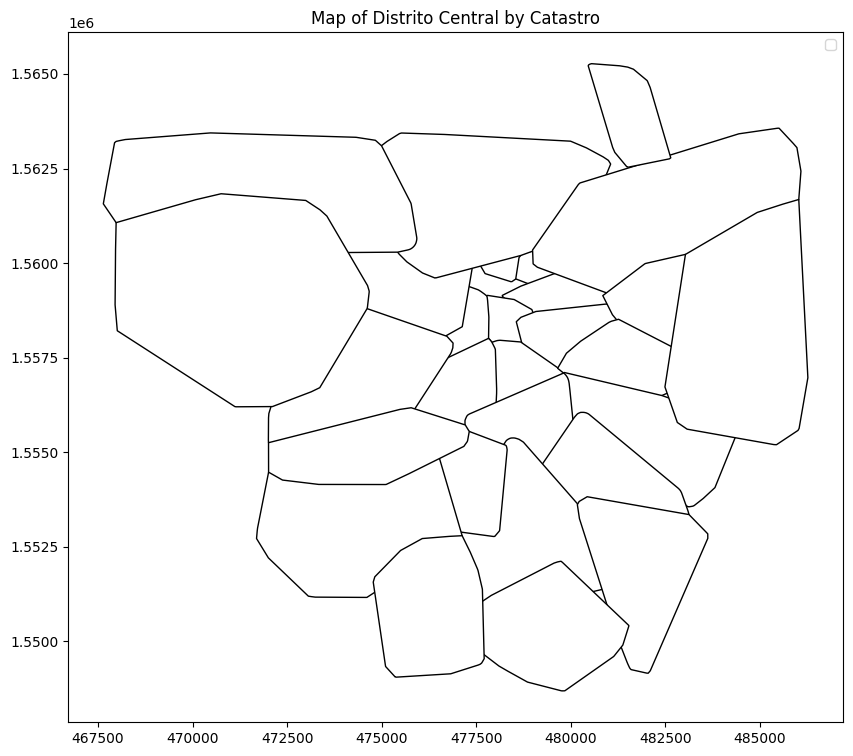

In [272]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot each GeoDataFrame with different colors and labels

sectors_gdf.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Set legend to show the labels
ax.legend()

# Set the title of the plot
ax.set_title('Map of Distrito Central by Catastro')

# Show the plot
plt.show()

**Matching with the census**

In [79]:

## This code it to match as many communities between the census data called needs and the catastros, it takes a while to run

df1 = pd.read_csv('needs.csv')
df2 = pd.DataFrame(dc_catastro)


# Step 1: Standardize the column names 
df1['standardized_name'] = df1['Nombre del Barrio o Colonia'].str.lower().str.strip()
df2['standardized_name'] = df2['NOM_COL'].str.lower().str.strip()

# Step 2: Apply string normalization
def normalize_string(s):
    # Example normalization: remove 'colonia' and 'bo.'
    replacements = {'colonia': '', 'bo.': ''}
    for old, new in replacements.items():
        s = s.replace(old, new)
    return s.strip()

df1['normalized_name'] = df1['standardized_name'].apply(normalize_string)
df2['normalized_name'] = df2['standardized_name'].apply(normalize_string)

# Step 3: Fuzzy matching
# Create a dictionary to hold the best matches
matches = {}

# Define a threshold for matching
threshold = 90

for name in df1['normalized_name']:
    # Use fuzzywuzzy to get the closest match in df2
    result = process.extractOne(name, df2['normalized_name'])
    if result:
        match, score = result[0], result[1]  # Only take the first two elements of the tuple
        if score >= threshold:
            matches[name] = match

# Step 4: Merge or match the DataFrames based on the matches found
# This will create a new dataframe with matched entries
matched_df = pd.DataFrame([(k, v) for k, v in matches.items()], columns=['df1_name', 'df2_name'])

# merge
result_df1 = pd.merge(df1, matched_df, left_on='normalized_name', right_on='df1_name', how='left')
result_df2 = pd.merge(df2, matched_df, left_on='normalized_name', right_on='df2_name', how='left')

# result_df1 and result_df2 now have a column that you can use to align entries between them




In [274]:
## Merge and set geometries

result_df2 = result_df2[result_df2['df1_name'].notna()]
result_df1 = result_df1[result_df1['df1_name'].notna()]

merged_df = result_df1.merge(result_df2, on='df1_name', how='inner')

merged_df = gpd.GeoDataFrame(merged_df, geometry='geometry')





**Maps with Inequality**

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\1859232702.py:21: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


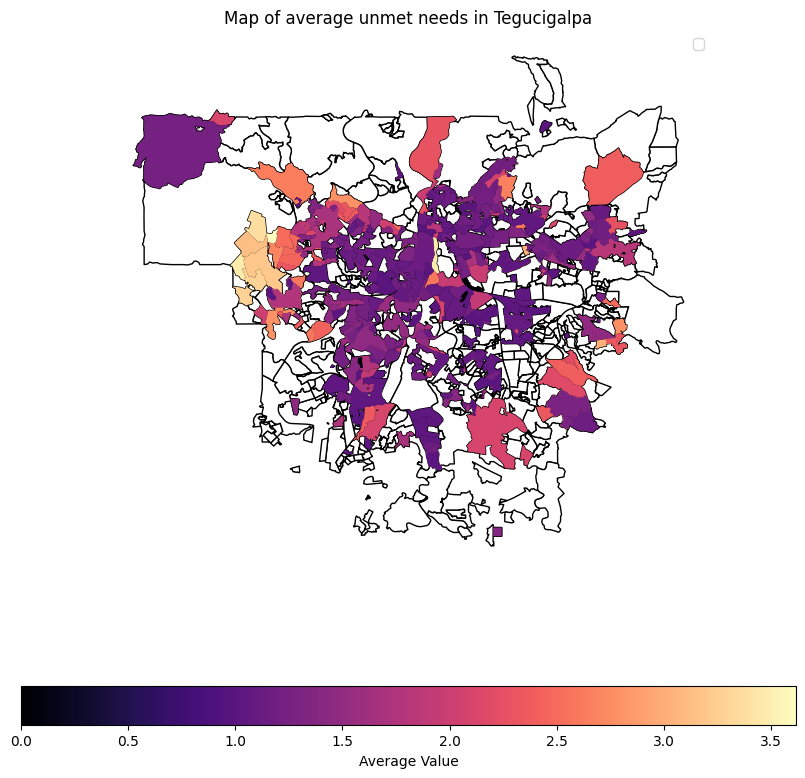

In [269]:
#Plotting Unmet needs

# Plot base layer
fig, ax = plt.subplots(figsize=(10, 10))

merged_df.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Plot heatmap layer based on 'avrg' values
# We use 'column' to specify which column to color by, and 'cmap' for the colormap

dc_catastro.plot(ax=ax, color='white', edgecolor='black', label='tegucigalpa Level 0')

merged_df.plot(ax=ax, column='avrg', cmap='magma', legend=True,
               legend_kwds={'label': "Average Value", 'orientation': "horizontal"})


# Improve map visuals
ax.set_title('Map of average unmet needs in Tegucigalpa')
ax.set_axis_off()  # Optional: Remove axis for cleaner map visuals

plt.legend()
plt.show()

In [270]:
# Group by the 'sector' colum to get value of catastro
grouped_inequality = merged_df.groupby('SECTOR')

# Aggregate the geometries by taking their union and compute the mean of 'avrg'
aggregated_geometries = grouped_inequality['geometry'].agg(lambda x: x.unary_union)
aggregated_avrg = grouped_inequality['avrg'].mean()

# Create a new GeoDataFrame with the aggregated geometries and average values
sectors_inequality_gdf = gpd.GeoDataFrame({
    'geometry': aggregated_geometries,
    'avrg': aggregated_avrg
})

# Make sure to reset the index if you want 'SECTOR' as a column in the new GeoDataFrame
sectors_inequality_gdf.reset_index(inplace=True)

display(sectors_inequality_gdf)







,SECTOR,geometry,avrg
0,SECTOR 01,"POLYGON ((477718.156 1559179.395, 477687.763 1...",1.314205
1,SECTOR 02,"MULTIPOLYGON (((477735.904 1560018.918, 477724...",1.244819
2,SECTOR 03,"POLYGON ((479776.785 1559752.462, 479775.317 1...",1.214250
3,SECTOR 04,"MULTIPOLYGON (((480323.127 1558643.558, 480308...",1.341331
4,SECTOR 05,"MULTIPOLYGON (((478572.114 1557992.987, 478560...",1.763544
5,SECTOR 06,"POLYGON ((477095.045 1556933.791, 477083.635 1...",1.215392
6,SECTOR 07,"MULTIPOLYGON (((475009.523 1558831.295, 475026...",1.568763
7,SECTOR 08,"MULTIPOLYGON (((476573.967 1561556.355, 476582...",1.552713
8,SECTOR 09,"MULTIPOLYGON (((480192.949 1559904.317, 480195...",1.444572
9,SECTOR 10,"MULTIPOLYGON (((478992.941 1557593.317, 479000...",1.459602


C:\Users\steph\AppData\Local\Temp\ipykernel_12880\461382535.py:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


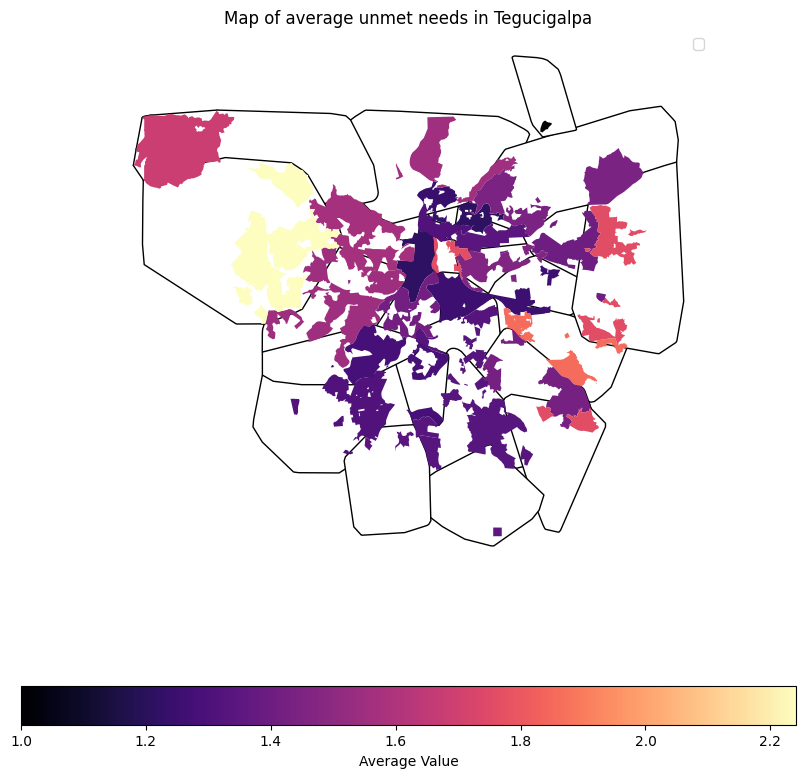

In [104]:
# Plot base layer
fig, ax = plt.subplots(figsize=(10, 10))

sectors_inequality_gdf.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Plot heatmap layer based on 'avrg' values
# We use 'column' to specify which column to color by, and 'cmap' for the colormap


sectors_gdf.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')
sectors_inequality_gdf.plot(ax=ax, column='avrg', cmap='magma', legend=True,
               legend_kwds={'label': "Average Value", 'orientation': "horizontal"})

# Improve map visuals
ax.set_title('Map of average unmet needs in Tegucigalpa')
ax.set_axis_off()  # Optional: Remove axis for cleaner map visuals

plt.legend()
plt.show()

In [122]:
# Merge the GeoDataFrames on 'SECTOR', ensuring an inner join
merged_inequality_df = sectors_gdf.merge(sectors_inequality_gdf, on='SECTOR', how='inner')

# Now that the dataframes are merged, ensure that the correct geometry column is retained.
# Assuming 'geometry_x' is the correct geometry to keep, we can rename it to just 'geometry'.
merged_inequality_df = merged_inequality_df.rename(columns={'geometry_x': 'geometry'})

# Drop the 'geometry_y' column as it is no longer needed.
merged_inequality_df = merged_inequality_df.drop(columns='geometry_y')

merged_inequality_df = gpd.GeoDataFrame(merged_inequality_df,geometry='geometry')

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\1497761766.py:17: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


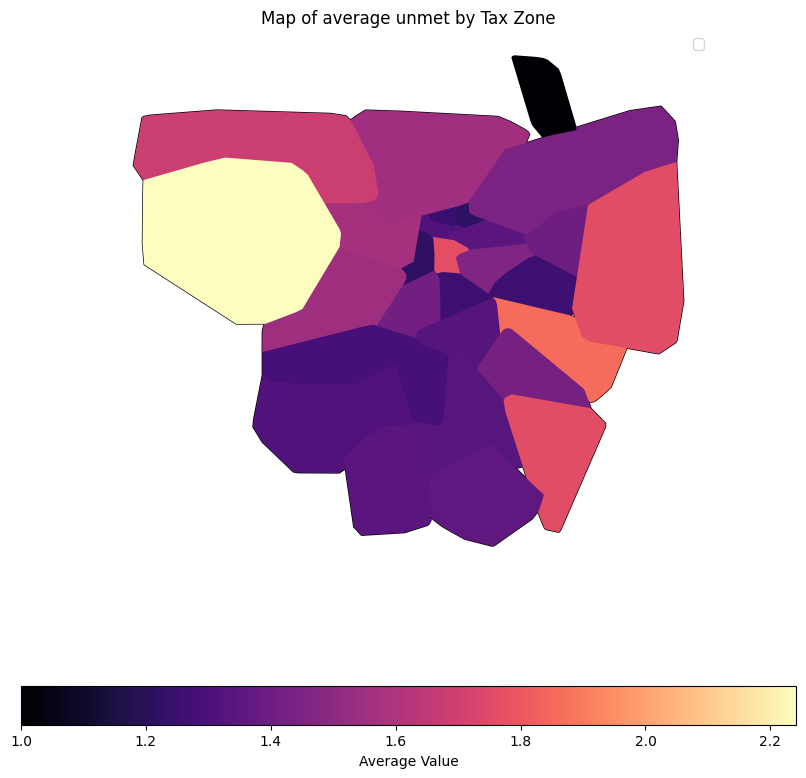

In [271]:
# Plot base layer
fig, ax = plt.subplots(figsize=(10, 10))

merged_inequality_df.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Plot heatmap layer based on 'avrg' values
# We use 'column' to specify which column to color by, and 'cmap' for the colormap


merged_inequality_df.plot(ax=ax, column='avrg', cmap='magma', legend=True,
               legend_kwds={'label': "Average Value", 'orientation': "horizontal"})

# Improve map visuals
ax.set_title('Map of average unmet by Tax Zone')
ax.set_axis_off()  # Optional: Remove axis for cleaner map visuals

plt.legend()
plt.show()




**Checking for resource distribution**

In [216]:
## I made a copy of the dataset in case i break it incluiding data from OSM
dc_catastro_2 = dc_catastro
dc_catastro_2.crs = "epsg:32616"
buildings = buildings.to_crs(epsg=32616)

tegucigalpa_buildings = gpd.sjoin(buildings,dc_catastro_2, how="inner", predicate='intersects')

unique_types = tegucigalpa_buildings['name'].unique()


hospitals = tegucigalpa_buildings[tegucigalpa_buildings['type']=='hospital']
schools = tegucigalpa_buildings[tegucigalpa_buildings['type']=='school']


display(schools)



,osm_id,code,fclass,name,type,geometry,index_right,FID,fid,OBJECTID,SECTOR,NOM_COL,COD_COL_1,COD_COL_2,TIPO,COD_COL_3,OBSERVACIO,Shape_Leng,Shape_Area
633,224300513,1500,building,None,school,"POLYGON ((483496.508 1559697.049, 483542.801 1...",955,COLONIAS_AREA_URBANA_DC.950,950,0,SECTOR 29,COLONIA LA SOSA,2914,1604,BARRIO O COLONIA,,,0,0
634,224300515,1500,building,None,school,"POLYGON ((483543.212 1559628.006, 483648.347 1...",955,COLONIAS_AREA_URBANA_DC.950,950,0,SECTOR 29,COLONIA LA SOSA,2914,1604,BARRIO O COLONIA,,,0,0
645,224427659,1500,building,None,school,"POLYGON ((475754.982 1559878.683, 475761.702 1...",724,COLONIAS_AREA_URBANA_DC.717,717,788,SECTOR 07,COLONIA FLOR No. 1,725,,BARRIO O COLONIA,,,2117.141838,194955.609
667,224707163,1500,building,Kinder Imaculada Concepcion,school,"POLYGON ((483017.244 1559684.359, 483020.301 1...",647,COLONIAS_AREA_URBANA_DC.642,642,710,SECTOR 16,COLONIA ESTADOS UNIDOS,1601,,BARRIO O COLONIA,,,1384.634238,108975.3109
672,224707168,1500,building,None,school,"POLYGON ((483481.904 1559781.288, 483496.208 1...",944,COLONIAS_AREA_URBANA_DC.945,945,0,SECTOR 29,COLONIA EL SITIO,2922,,BARRIO O COLONIA,,,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675654,1032728459,1500,building,None,school,"POLYGON ((479150.878 1554239.969, 479158.487 1...",250,COLONIAS_AREA_URBANA_DC.241,241,262,SECTOR 21,COLONIA MONTERREY,2120,,BARRIO O COLONIA,,,2502.040319,168961.0657
675655,1032728460,1500,building,None,school,"POLYGON ((479127.628 1554232.468, 479164.947 1...",250,COLONIAS_AREA_URBANA_DC.241,241,262,SECTOR 21,COLONIA MONTERREY,2120,,BARRIO O COLONIA,,,2502.040319,168961.0657
678766,1043520609,1500,building,None,school,"POLYGON ((477357.991 1559675.064, 477366.859 1...",4,COLONIAS_AREA_URBANA_DC.13,13,13,SECTOR 01,BARRIO ABAJO,101,,BARRIO O COLONIA,,,1895.652517,141541.1671
679353,1070017428,1500,building,None,school,"POLYGON ((482620.957 1553976.457, 482622.125 1...",161,COLONIAS_AREA_URBANA_DC.152,152,172,SECTOR 20,COLONIA VILLA NUEVA SUR,2022,,BARRIO O COLONIA,,,4744.901234,689077.9163


c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\steph\AppData\Local\Temp\ipykernel_12880\212972529.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


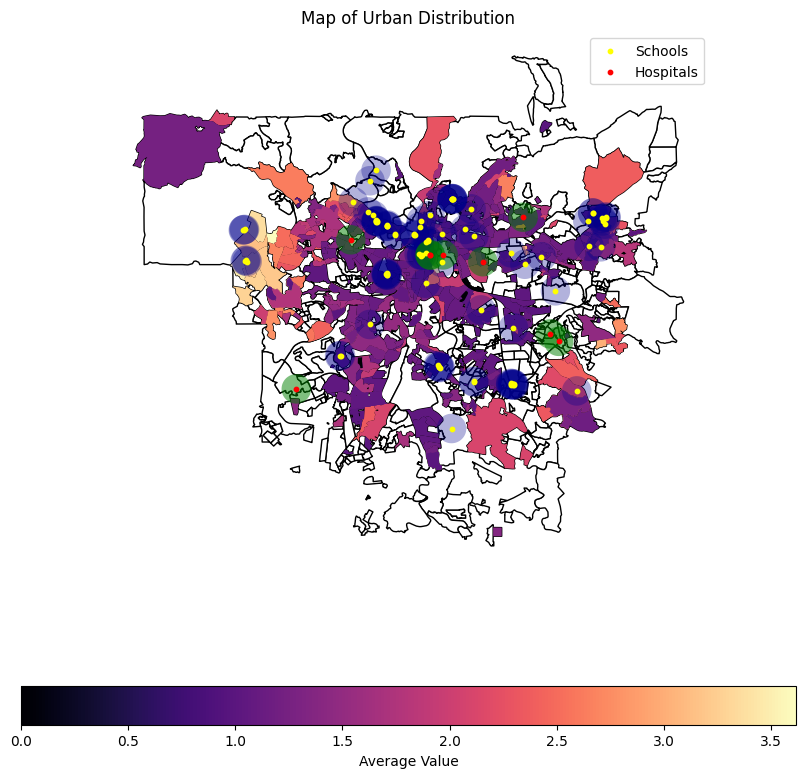

In [214]:
hospitals['centroid'] = hospitals.geometry.centroid
schools['centroid'] = schools.geometry.centroid

# Buffer the centroids - the buffer distance will depend on your CRS and required size
# For example, 1000 could be 1000 meters if your CRS is in meters
hospitals['buffer'] = hospitals.centroid.buffer(500)  # Adjust the buffer size as needed
schools['buffer'] = schools.centroid.buffer(500)

# Plot the base layer
fig, ax = plt.subplots(figsize=(10, 10))
dc_catastro.plot(ax=ax, color='white', edgecolor='black', label='Tegucigalpa Level 0')
merged_df.plot(ax=ax, column='avrg', cmap='magma', legend=True,
               legend_kwds={'label': "Average Value", 'orientation': "horizontal"})

# Plot the school buffers
schools['buffer'].plot(ax=ax, color='darkblue', alpha=0.3, label='School Buffers')
# Plot the hospital buffers
hospitals['buffer'].plot(ax=ax, color='green', alpha=0.5, label='Hospital Buffers')

# Optionally, plot the school and hospital points on top of the buffers
schools.centroid.plot(ax=ax, marker='o', color='yellow', markersize=10, label='Schools')
hospitals.centroid.plot(ax=ax, marker='o', color='red', markersize=10, label='Hospitals')

# Improve map visuals
ax.set_title('Map of Urban Distribution')
ax.set_axis_off()

plt.legend()
plt.show()

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\3363904432.py:25: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


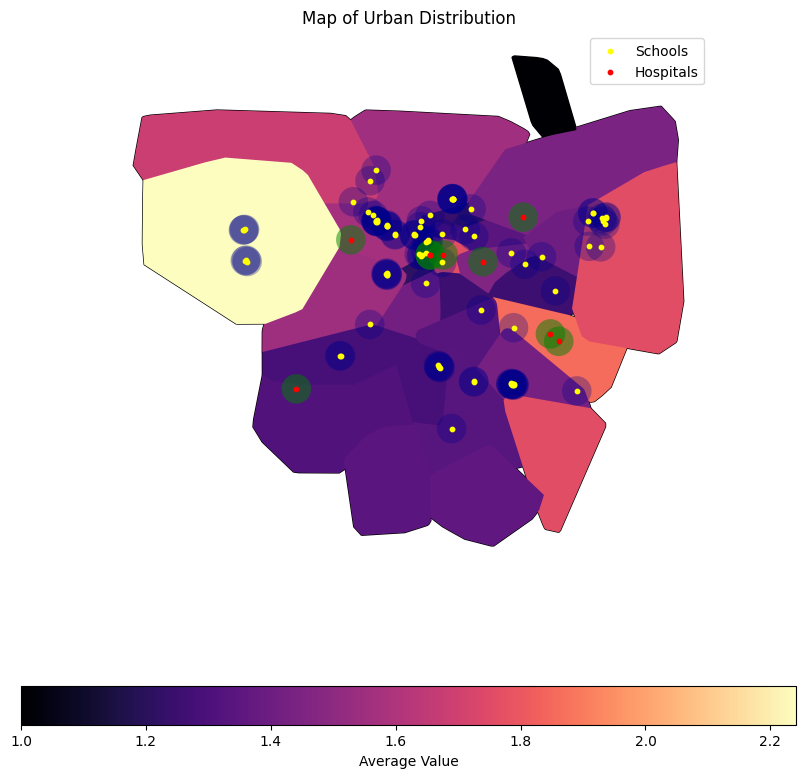

In [215]:
# Plot base layer
fig, ax = plt.subplots(figsize=(10, 10))

merged_inequality_df.plot(ax=ax, color='white', edgecolor='black', label='Honduras Level 0')

# Plot heatmap layer based on 'avrg' values
# We use 'column' to specify which column to color by, and 'cmap' for the colormap


merged_inequality_df.plot(ax=ax, column='avrg', cmap='magma', legend=True,
               legend_kwds={'label': "Average Value", 'orientation': "horizontal"})

# Plot the hospital buffers
schools['buffer'].plot(ax=ax, color='darkblue', alpha=0.3, label='School Buffers')
hospitals['buffer'].plot(ax=ax, color='green', alpha=0.5, label='Hospital Buffers')

# Optionally, plot the hospital points on top of the buffers
schools.centroid.plot(ax=ax, marker='o', color='yellow', markersize=10, label='Schools')
hospitals.centroid.plot(ax=ax, marker='o', color='red', markersize=10, label='Hospitals')

# Improve map visuals
ax.set_title('Map of Urban Distribution')
ax.set_axis_off()

plt.legend()
plt.show()


# **Spatial Autocorrelation** #

C:\Users\steph\AppData\Local\Temp\ipykernel_12880\4040164898.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_df)


('WARNING: ', 10, ' is an island (no neighbors)')
('WARNING: ', 30, ' is an island (no neighbors)')
('WARNING: ', 141, ' is an island (no neighbors)')
('WARNING: ', 142, ' is an island (no neighbors)')
('WARNING: ', 143, ' is an island (no neighbors)')
('WARNING: ', 151, ' is an island (no neighbors)')
('WARNING: ', 185, ' is an island (no neighbors)')
('WARNING: ', 194, ' is an island (no neighbors)')
('WARNING: ', 223, ' is an island (no neighbors)')
('WARNING: ', 240, ' is an island (no neighbors)')
('WARNING: ', 253, ' is an island (no neighbors)')
('WARNING: ', 278, ' is an island (no neighbors)')
('WARNING: ', 280, ' is an island (no neighbors)')
('WARNING: ', 339, ' is an island (no neighbors)')
('WARNING: ', 351, ' is an island (no neighbors)')
('WARNING: ', 366, ' is an island (no neighbors)')
('WARNING: ', 376, ' is an island (no neighbors)')
('WARNING: ', 448, ' is an island (no neighbors)')
('WARNING: ', 478, ' is an island (no neighbors)')
('WARNING: ', 484, ' is an island

c:\Users\steph\AppData\Local\Programs\Python\Python312\Lib\site-packages\splot\_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


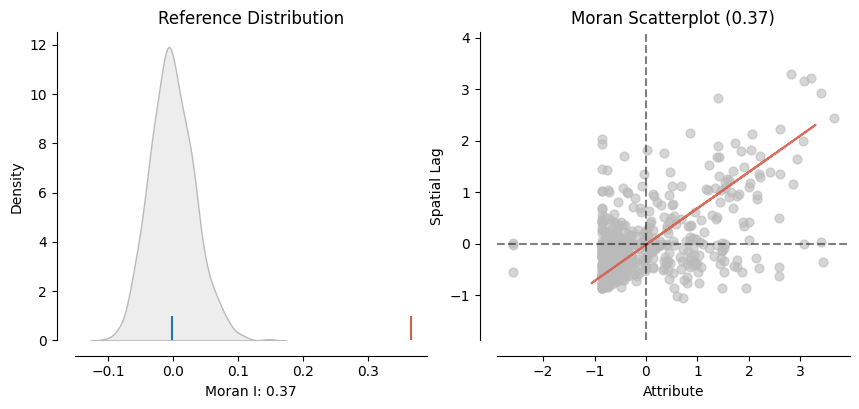

In [247]:
##Spacial Autocorrelation

w = Queen.from_dataframe(merged_df)
w.transform = 'r'  # Row-standardize the weights
y = merged_df['avrg'].values
moran = Moran(y, w)

## Results
print(f"Moran's I: {moran.I:.4f}")
print(f"P-value: {moran.p_sim:.4f}")
plot_moran(moran, zstandard=True)
plt.show()